# Data Cleaning

## Objectives

* Answer business requirement 1: The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/HousePricesRecords.csv

## Outputs

* Create a visualisation of the correlation between house attributes and the sale price. Create scatter plots and heat map showing each house attribute and the individual effect
* Save the corellation to outputs/house_price_corellation/v1/corr_df_rev.csv
* Save the dictionary used for object variables to outputs/house_price_corellation/v1/dic.csv

## Conclusion



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML-PROJECT/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-ML-PROJECT'

# Load Data

In [6]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/housing_data_cleaned.csv"))
df.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856.0,854.0,3.0,1,706.0,6.0,150.0,548.0,2.0,2003.0,...,8450.0,65.0,196.0,61.0,5,7,856.0,2003,2003,208500.0
1,1262.0,0.0,3.0,4,978.0,5.0,284.0,460.0,2.0,1976.0,...,9600.0,80.0,0.0,0.0,8,6,1262.0,1976,1976,181500.0
2,920.0,866.0,3.0,2,486.0,6.0,434.0,608.0,2.0,2001.0,...,11250.0,68.0,162.0,42.0,5,7,920.0,2001,2002,223500.0
3,961.0,0.0,3.0,1,216.0,5.0,540.0,642.0,1.0,1998.0,...,9550.0,60.0,0.0,35.0,5,7,756.0,1915,1970,140000.0
4,1145.0,0.0,4.0,3,655.0,6.0,490.0,836.0,2.0,2000.0,...,14260.0,84.0,350.0,84.0,5,8,1145.0,2000,2000,250000.0
5,796.0,566.0,1.0,1,732.0,6.0,64.0,480.0,1.0,1993.0,...,14115.0,85.0,0.0,30.0,5,5,796.0,1993,1995,143000.0
6,1694.0,0.0,3.0,3,1369.0,6.0,317.0,636.0,2.0,2004.0,...,10084.0,75.0,186.0,57.0,5,8,1686.0,2004,2005,307000.0
7,1107.0,983.0,3.0,2,859.0,5.0,216.0,484.0,2.0,1973.0,...,10382.0,69.0,240.0,204.0,6,7,1107.0,1973,1973,200000.0
8,1022.0,752.0,2.0,1,0.0,1.0,952.0,468.0,1.0,1931.0,...,6120.0,51.0,0.0,0.0,5,7,952.0,1931,1950,129900.0
9,1077.0,0.0,2.0,1,851.0,6.0,140.0,205.0,2.0,1939.0,...,7420.0,50.0,0.0,4.0,6,5,991.0,1939,1950,118000.0


---

# Data Understanding 

We are interested in understanding the dataset, checking the variable type and distribution, missing values and what these variables mean to the business

In [7]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

/tmp/ipykernel_7380/962869596.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Study of Correlation

- Compute the correlation matrix to find relationships between features.
- Extract and sort the top features correlated with sales price.

In [8]:
corr_matrix = df.corr()
corr_with_price = corr_matrix['SalePrice'].drop('SalePrice').sort_values(ascending=False)

print("Top Features Correlated with Sale Price:")
corr_with_price.head(10)



Top Features Correlated with Sale Price:


OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
GarageYrBlt     0.466754
Name: SalePrice, dtype: float64

## Visualise Correlation Heatmap

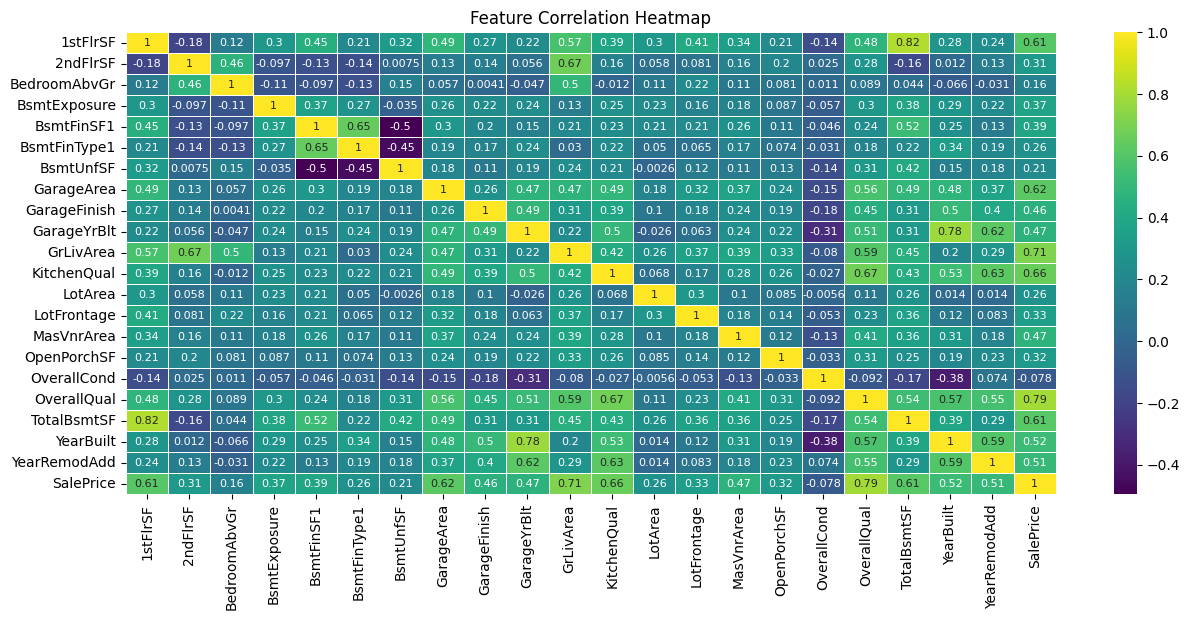

In [20]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = df.corr()

fig, axes = plt.subplots(figsize=(15,6))
annot_size = 8

sns.heatmap(data=corr_matrix, annot=True, xticklabels=True, yticklabels=True, cmap='viridis', annot_kws={"size": annot_size}, ax=axes,
            linewidth=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

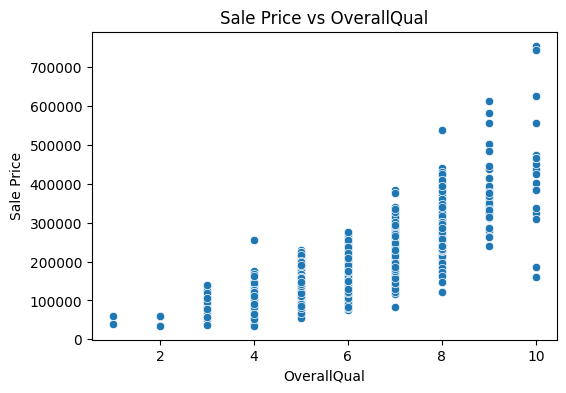

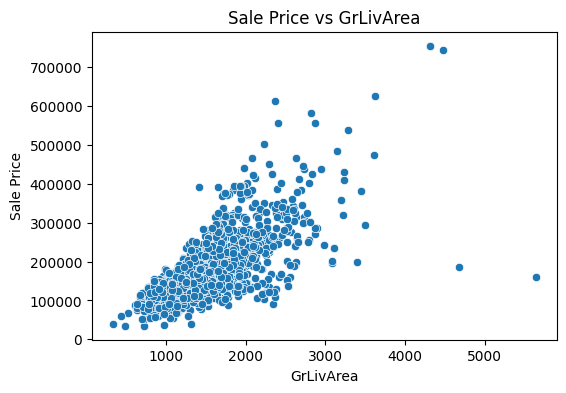

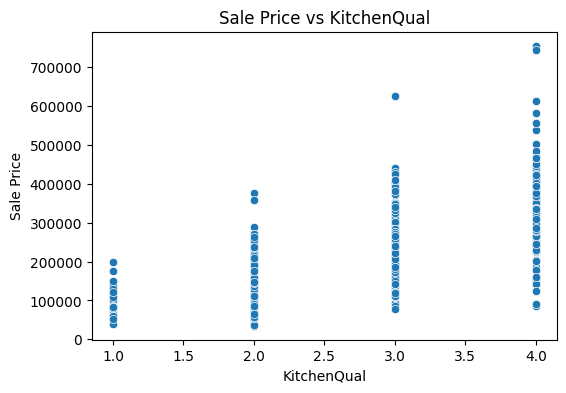

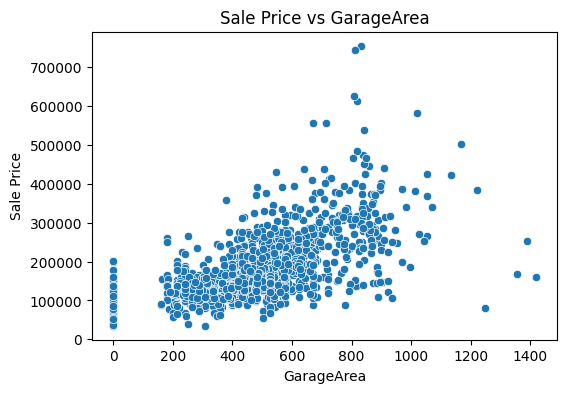

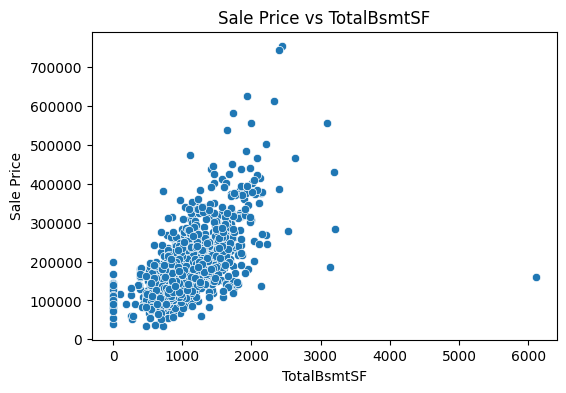

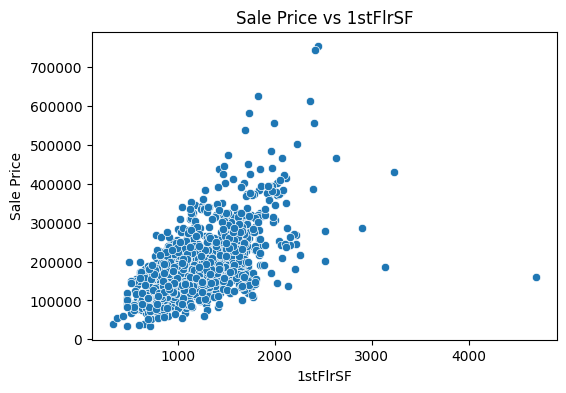

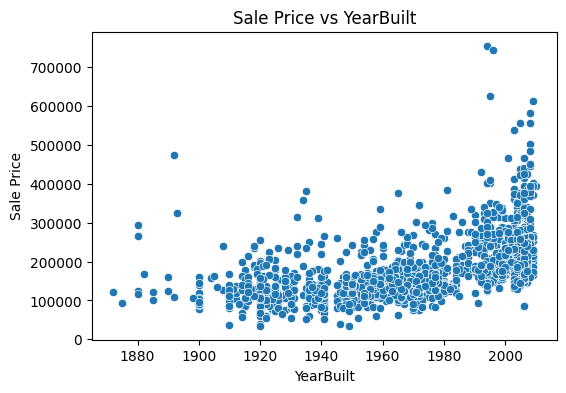

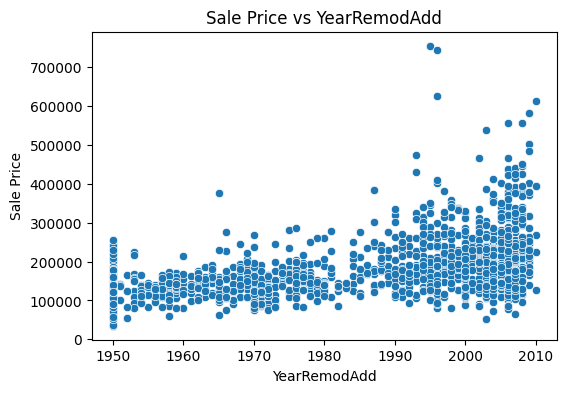

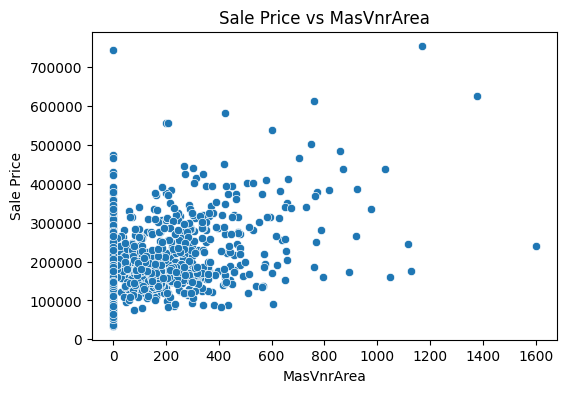

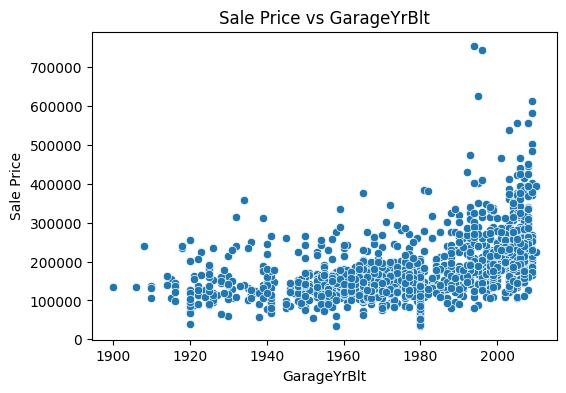

In [24]:
top_var = corr_with_price.head(10).index

for var in top_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[var], y=df['SalePrice'])
    plt.title(f"Sale Price vs {var}")
    plt.xlabel(var)
    plt.ylabel("Sale Price")
    plt.show()

---

NOTE

* You may add as many sections as you want, as long as they support your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---